This torch implementation of focal loss only address binary-class classification problems.

Reference: [https://arxiv.org/pdf/1708.02002.pdf](https://arxiv.org/pdf/1708.02002.pdf).

In [1]:
import numpy as np
import torch
from torch import nn
import torchvision
import torch.distributions as normal

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class LogLoss(nn.Module):
    def __init__(self) -> None:
        super(LogLoss, self).__init__()

    def forward(self, input, target):
        pos = target==1
        out = torch.empty_like(input)
        out[pos] = torch.log(input[pos])
        out[~pos] = torch.log(1-input[~pos])

        return -torch.mean(out)

loss_fn = nn.BCELoss()
input = torch.linspace(.3, 1-.3, 100)
target = torch.randint(2, size=(100,), dtype=torch.float32)
print(loss_fn(input, target) == LogLoss()(input, target))

tensor(True)


In [3]:
class BinaryFocalLoss(nn.Module):
    """ A torch implementation of Focal Loss.
        Reference: [https://arxiv.org/pdf/1708.02002.pdf](https://arxiv.org/pdf/1708.02002.pdf).
    """
    def __init__(self, gamma: int, alpha: int = None, size_average: bool = None) -> None:
        super(BinaryFocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.size_average = size_average

    def forward(self, input: torch.Tensor, target: torch.Tensor) -> torch.Tensor:
        pos = target==1
        a_t, p_t = torch.ones_like(input), torch.ones_like(input)
        p_t = torch.where(pos, input, 1-input)
        if self.alpha is not None:
            a_t = torch.where(pos, self.alpha, 1-self.alpha)
        fl = - a_t * (1-p_t)**self.gamma * torch.log(p_t)
        
        if self.size_average is None:
            out = fl
        elif self.size_average:
            out = fl.mean()
        else:
            out = fl.sum()
        return out

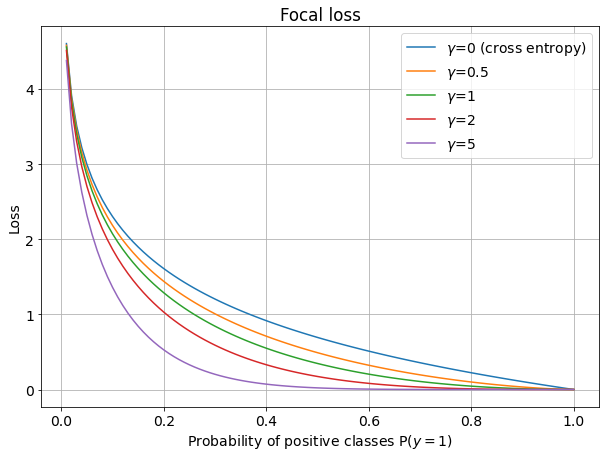

In [4]:
plt.figure(figsize=(10,7))
matplotlib.rc('font', size=14)
for gamma in [0, .5, 1, 2, 5]:
    loss_fn = BinaryFocalLoss(gamma=gamma)
    input = torch.linspace(0.01, 1, 100)
    target = torch.randint(1, 2, size=(100,))
    plt.plot(input, loss_fn(input, target), label=f"$\gamma$={gamma} {'(cross entropy)' if not gamma else ''}")

plt.xlabel("Probability of positive classes $\mathrm{P}(y=1)$")
plt.ylabel("Loss")
plt.title("Focal loss")
plt.legend()
plt.grid()
plt.show()